# Week 7 Assignment

In [126]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox

In [127]:
df = pd.read_csv('data/combined data.csv')
censusdata = gpd.read_file('data/Census_Tracts_2020.geojson')

In [128]:
columns = list(censusdata) 
columns

['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry']

In [129]:
censusdata['tract']='06' + '037' + censusdata ['CT20']

In [131]:
censusdata.columns = ['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry',
 'census tract']

In [132]:
df.columns 

Index(['Unnamed: 0', 'tract', 'census tract', 'sup_dist', 'csa', 'spa',
       'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [133]:
df.columns = ['Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa', 'spa',
       'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent']
df.columns

Index(['Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa', 'spa', 'ESRI_OID',
       'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [134]:
censusdata.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract'],
      dtype='object')

In [141]:
df['census tract']='0'+ df['tract'].apply(str)

In [142]:
censusdata['census tract']='06' + '037' + censusdata ['CT20']

In [143]:
censusdata.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census tract
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [144]:
LBW=censusdata.merge(df,on="census tract")

In [145]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [146]:
LBW.columns=['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'tract_x', 'census tract', 'Unnamed: 0', 'tract_y', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent']

<Axes: >

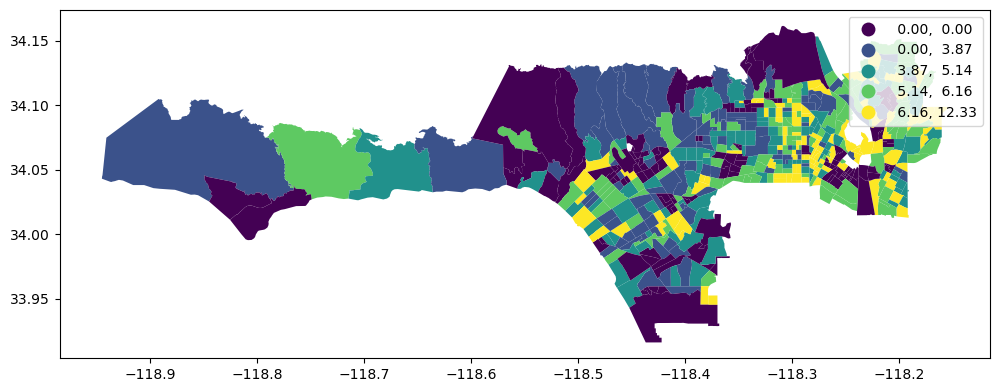

In [147]:
LBW.plot(figsize=(12,10),
                 column='Low Birth Weight',
                 legend=True, 
                 scheme='quantiles')

<Axes: title={'center': 'Low Birth Weight'}, xlabel='spa'>

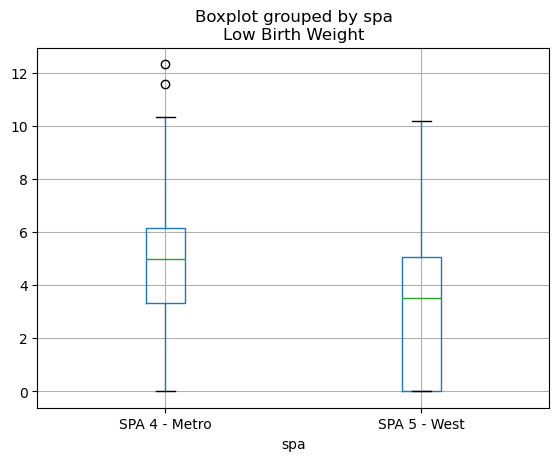

In [148]:
LBW.boxplot(by='spa', column=['Low Birth Weight'])

In [149]:
df2=gpd.read_file('data/Service_Planning_Areas_2022_(view).geojson')

In [150]:
spadata = df2[df2['LABEL'].isin(['SPA 4','SPA 5'])]

In [151]:
spadata.head()

,OBJECTID,SPA,SPA_NAME,ABBV,LABEL,SPA_NUM,SHAPE_Length,SHAPE_Area,geometry
3,4,4,Metro,MET,SPA 4,4,0.917778,0.023182,"MULTIPOLYGON (((-118.30435 34.15884, -118.3028..."
4,5,5,West,W,SPA 5,5,1.985634,0.048126,"MULTIPOLYGON (((-118.94470 34.04501, -118.9446..."


(-118.98468685952861,
 -118.11580661859385,
 33.90405627879157,
 34.17370041571767)

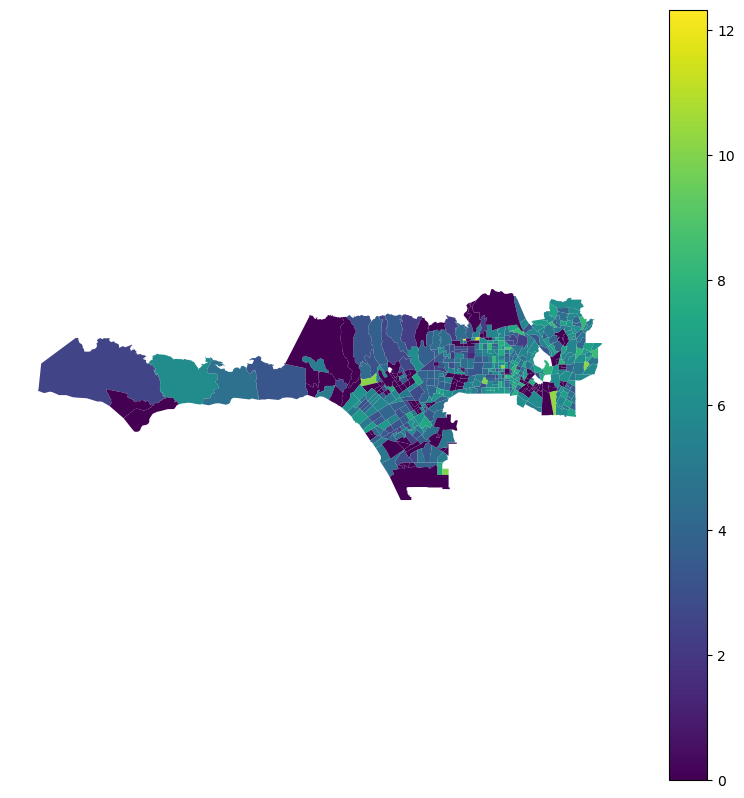

In [152]:
fig, ax = plt.subplots(figsize=(10,10))
LBW.plot(ax=ax,
               linewidth=.001,
               edgecolor='gray', 
               zorder=20,
                column='Low Birth Weight',
                 legend=True, 
                alpha=1)

spadata.plot(ax=ax,
               linewidth=5,
               zorder=10,
                alpha=.02)
ax.axis('off')

In [153]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'tract_x', 'census tract', 'Unnamed: 0', 'tract_y', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Access',
       'Grocery Store Access Percent'],
      dtype='object')

In [154]:
LBW4=LBW[LBW.spa == 'SPA 4 - Metro']


In [155]:
LBW5=LBW[LBW.spa == 'SPA 5 - West']
